<center>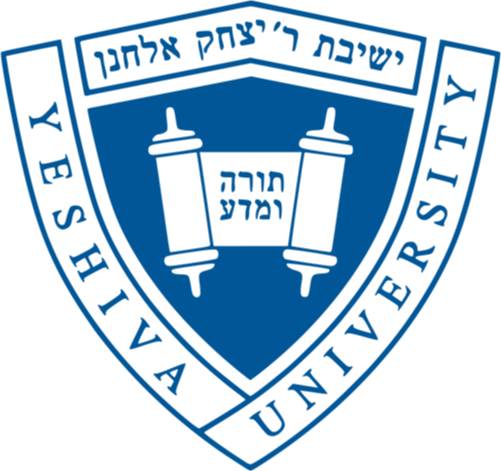</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5007 Neural Networks and Deep Learning</h1>
<p>
<h2 style='text-align: center;'>Homework 05</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# Package import

In [26]:
# Import some important packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image
import os
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier # using 1NN
import random

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 1. Download the [cow teat datasets](https://github.com/YoushanZhang/SCTL) (10 points) resize image to (224, 224)

### (1). Create a train data loader that returns image arrays and labels

In [36]:
def trainLoader(folder):

    def getPicFiles(path):
        myPics = []

        for name in sorted(os.listdir(path)):

            full_path = path + "/" + name
            names.append(name)
                
            # Load one pic file
            pic = cv.imread(full_path)
            if pic is not None:
                pic = cv.resize(pic, (224, 224), interpolation = cv.INTER_LINEAR)
            else:
                print("No pic")
            
            myPics.append(pic)

        return np.array(myPics)

    # Read names of train folderes
    path = [folder + fol for fol in os.listdir(folder)]

    # Load image names for individual score classes
    pictures = []
    names = []
    for idx, _ in enumerate(path):
        pictures.append(getPicFiles(path[idx]))
    

    X = pictures[0]
    for i in range(1, len(pictures)):
        X = np.vstack((X, pictures[i]))

    y = np.array([])
    for idx in range(len(pictures)):
        y = np.concatenate((y, (idx + 1) * np.ones(len(pictures[idx]), dtype = int)))

    return X, y.astype(int), names

### (2). Create a test data loader that returns image arrays and file names

In [37]:
def testLoader(folder):

    def getPicFiles(path):
        myPics = []

        for name in sorted(os.listdir(path)):

            full_path = path + "/" + name
            names.append(name)
                
            # Load one pic file
            pic = cv.imread(full_path)
            if pic is not None:
                pic = cv.resize(pic, (224, 224), interpolation = cv.INTER_LINEAR)
            else:
                print("No pic")
            
            myPics.append(pic)

        return np.array(myPics)

    # Load image names for individual score classes
    pictures = []
    names = []
    pictures.append(getPicFiles(folder))
    

    X = pictures[0]
    for i in range(1, len(pictures)):
        X = np.vstack((X, pictures[i]))


    return X, names

### (3). Print image arrays, labels and file names dimensions 

#### Trainig data

In [38]:
# Trainig data
trainFolder = "./data/train/"

X_train, y_train, file_names_train = trainLoader(trainFolder)

# Dimensional check of X
print(f"X_train.shape = {X_train.shape}")

# Dimensional check of y
print(f"y_train.shape = {y_train.shape}")

# Count check of file names
print(f"len(file_names_train) = {len(file_names_train)}")

# Check sample of names
file_names_train[500:520]

X_train.shape = (1149, 224, 224, 3)
y_train.shape = (1149,)
len(file_names_train) = 1149


['20200724_094504_LF_C2_PN_M.jpg',
 '20200724_094504_RF_C2_PN_M.jpg',
 '20200724_094509_LF_C2_PN_M.jpg',
 '20200724_094509_LH_C2_PN_M.jpg',
 '20200724_094509_RH_C2_PN_M.jpg',
 '20200724_094514_LH_C2_PN_M.jpg',
 '20200724_094514_RH_C2_PN_M.jpg',
 '20200724_094519_LF_C2_PN_M.jpg',
 '20200724_094525_LF_C2_PN_M.jpg',
 '20200724_094525_RF_C2_PN_M.jpg',
 '20200724_094537_LF_C2_PP_M.jpg',
 '20200724_094537_LH_C2_PP_M.jpg',
 '20200724_094537_RF_C2_PP_M.jpg',
 '20200724_094537_RH_C2_PP_M.jpg',
 '20200724_094541_LH_C2_PN_M.jpg',
 '20200724_094546_RH_C2_PN_M.jpg',
 '20200724_094553_LH_C2_PN_M.jpg',
 '20200724_094614_RF_C2_PN_M.jpg',
 '20200724_094619_RH_C2_PN_M.jpg',
 '20200724_094623_LF_C2_PP_M.jpg']

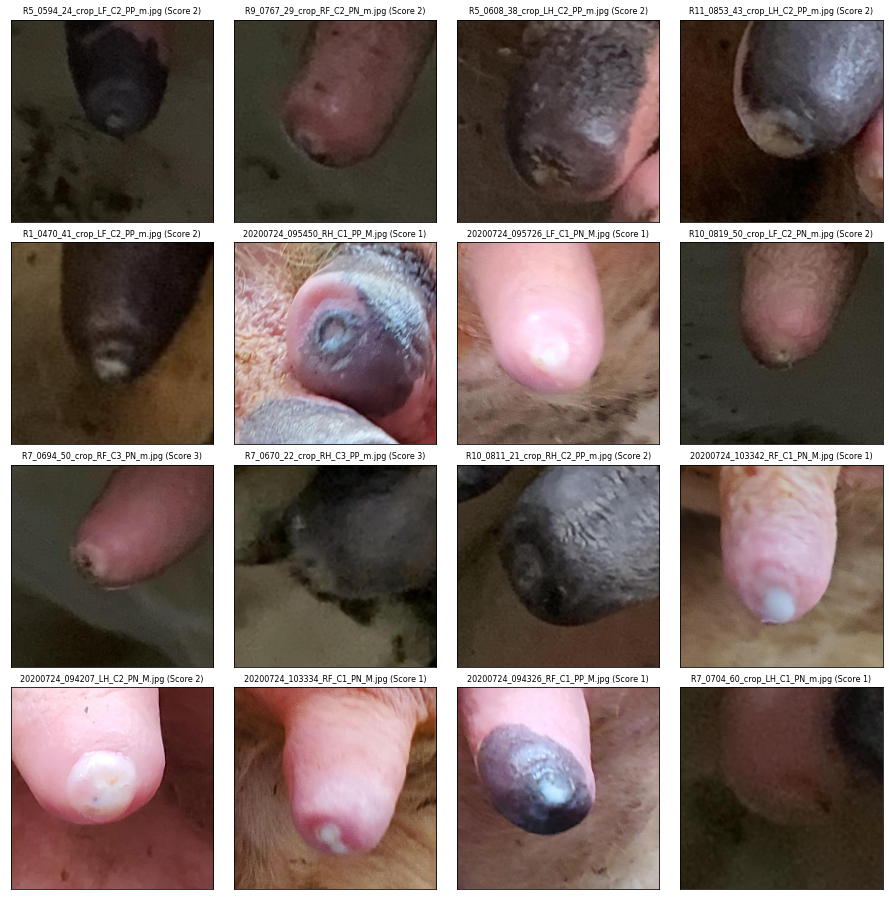

In [42]:
# Sample of 16 random images from the training data
random.seed(2023)
rand_sixteen_train = random.sample(range(len(file_names_train)), 16)

plt.figure(figsize = (16, 16))
for idx, img in enumerate(rand_sixteen_train):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(cv.cvtColor(X_train[img], cv.COLOR_BGR2RGB))
    plt.title(file_names_train[img] + " (Score " + str(y_train[img])+ ")", fontsize = 8)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.0, hspace = 0.1)

plt.show()

### Test data

In [43]:
# Test data
testFolder = "./data/test/"

X_test, file_names_test = testLoader(testFolder)

# Dimensional check of X
print(f"X_test.shape = {X_test.shape}")

# Count check of file names
print(f"len(file_names_test) = {len(file_names_test)}")

# Check sample of names
file_names_test[200:220]

X_test.shape = (380, 224, 224, 3)
len(file_names_test) = 380


['R10_0807_17_crop_LF_C3_PP_m.jpg',
 'R10_0807_17_crop_RF_C2_PP_m.jpg',
 'R10_0807_17_crop_RH_C3_PP_m.jpg',
 'R10_0809_19_crop_LF_C2_PN_m.jpg',
 'R10_0809_19_crop_LH_C2_PN_m.jpg',
 'R10_0809_19_crop_RF_C2_PN_m.jpg',
 'R10_0811_21_crop_LH_C2_PP_m.jpg',
 'R10_0811_21_crop_RF_C2_PP_m.jpg',
 'R10_0813_22_crop_LF_C2_PN_m.jpg',
 'R10_0815_43_crop_LF_C2_PN_m.jpg',
 'R10_0815_43_crop_LH_C1_PN_m.jpg',
 'R10_0823_56_crop_LH_C2_PP_m.jpg',
 'R10_0825_59_crop_LF_C2_PN_m.jpg',
 'R11_0829_6_crop_RF_C3_PN_m.jpg',
 'R11_0837_18_crop_LF_C2_PN_m.jpg',
 'R11_0837_18_crop_RH_C2_PN_m.jpg',
 'R11_0841_27_crop_LF_C2_PN_m.jpg',
 'R11_0841_27_crop_LH_C2_PN_m.jpg',
 'R11_0841_27_crop_RH_C3_PN_m.jpg',
 'R11_0843_31_crop_LF_C2_PN_m.jpg']

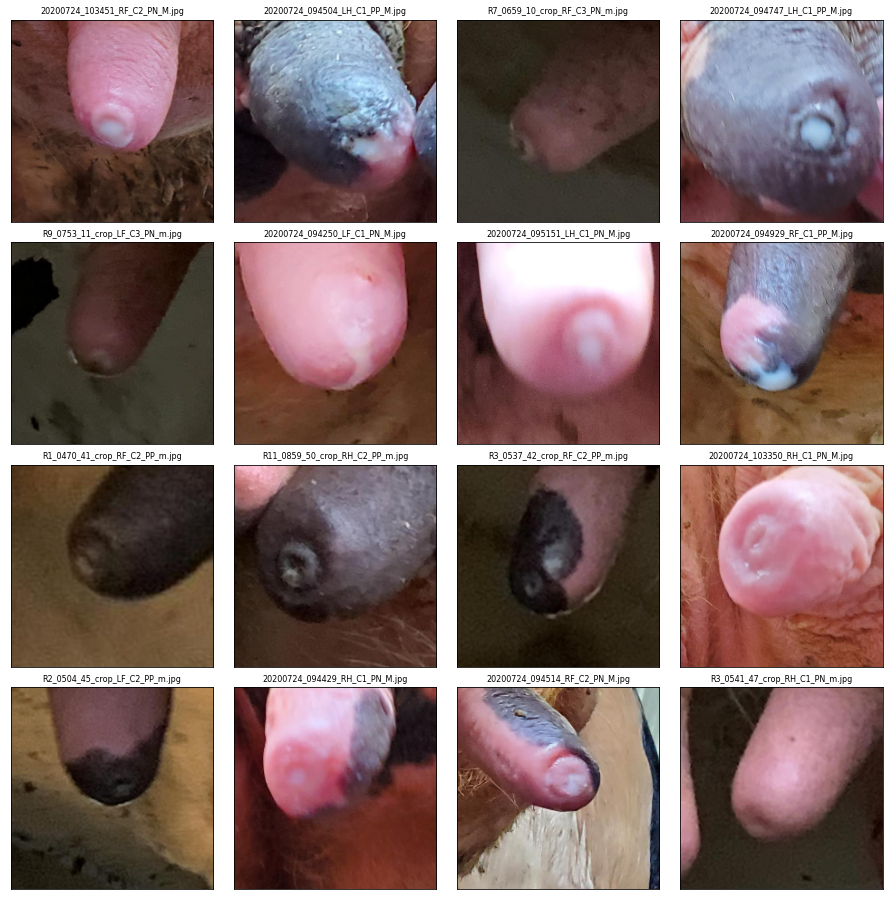

In [44]:
# Sample of 16 random images from the test data
rand_sixteen_test = random.sample(range(len(file_names_test)), 16)

plt.figure(figsize = (16, 16))
for idx, img in enumerate(rand_sixteen_test):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(cv.cvtColor(X_test[img], cv.COLOR_BGR2RGB))
    plt.title(file_names_test[img], fontsize = 8)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.0, hspace = 0.1)

plt.show()

# 2. Extract features of training and test images using HOG (20 points)
Please print the size of extracted features, e.g., training features: 1149 * d, test features: 380 *d

In [45]:
def HOG(data):
    '''
        Histograms of Oriented Gradients (HOG)
    '''
    my_images = []
    my_features = []

    for image in data:
        fd, hog_image = hog(image, orientations = 9, pixels_per_cell = (16, 16), cells_per_block = (2, 2), visualize = True, multichannel = True)

        my_features.append(fd)
        my_images.append(hog_image)

    return np.array(my_features), np.array(my_images)

In [47]:
hogFeatures_train, hogImages_train = HOG(X_train)
hogFeatures_test, hogImages_test = HOG(X_test)

In [48]:
# Training features
print(f"Training features : {hogFeatures_train.shape}")

# Test features
print(f"Test features : {hogFeatures_test.shape}")

Training features : (1149, 6084)
Test features : (380, 6084)


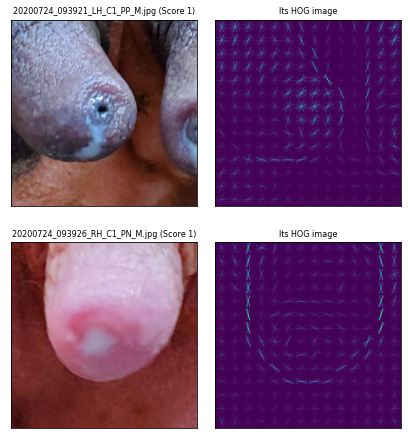

In [50]:
# Sample of 4 images from the training data
plt.figure(figsize = (7, 16))
for idx, img in enumerate(range(4)):
    plt.subplot(4, 2, idx + 1)
 
    if idx % 2 == 0:
        plt.imshow(cv.cvtColor(X_train[img], cv.COLOR_BGR2RGB))
        plt.title(file_names_train[img] + " (Score " + str(y_train[img])+ ")", fontsize = 8)
    else:
        plt.imshow(hogImages_train[img - 1])
        plt.title("Its HOG image", fontsize = 8)

    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

plt.show()

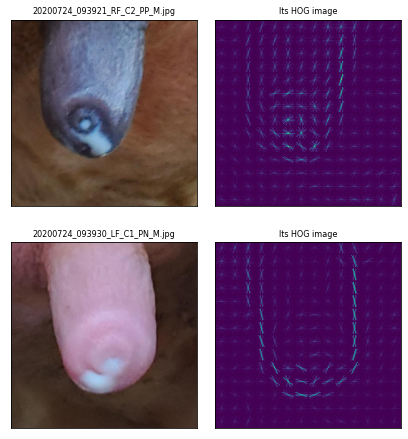

In [51]:
# Sample of 4 images from the test data
plt.figure(figsize = (7, 16))
for idx, img in enumerate(range(4)):
    plt.subplot(4, 2, idx + 1)

    if idx%2 == 0:
        plt.imshow(cv.cvtColor(X_test[img], cv.COLOR_BGR2RGB))
        plt.title(file_names_test[img], fontsize = 8)
    else:
        plt.imshow(hogImages_test[img - 1])
        plt.title("Its HOG image", fontsize = 8)

    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

plt.show()

# 3. Extract features of training and test images using SIFT (20 points)
Please print the size of extracted features, e.g., training features: 1149 * d, test features: 380 *d

In [52]:
def SIFT(data):
    '''
        Scale Invariant Feature Transform (SIFT)
    '''
    my_images = []
    my_features = []

    for image in data:
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

        # Initiate SIFT detector
        sift = cv.xfeatures2d.SIFT_create(nfeatures=30)
        # sift = cv.SIFT_create()

        # Detect and compute the keypoints and descriptors with SIFT
        keypoints, descriptors  = sift.detectAndCompute(gray, None)
        
        img = cv.drawKeypoints(gray, keypoints, image)
        my_images.append(img)

        # Select top 30 features for the pictures
        # Some descriptors are None
        if descriptors is not None:
            my_features.append(np.mean(descriptors,axis=0))
        else:
            my_features.append(np.zeros(128))

#         sorted_indices_train = np.argsort(abs_descriptors)[::-1]
#         selected_features = sorted_indices_train[:30]
#         keypoints = np.array(keypoints)
#         strongest_keypoints = keypoints[selected_features]
        

   
#         my_features.append(strongest_keypoints)
        

    return np.array(my_features), np.array(my_images)

In [53]:
siftFeatures_train, siftImages_train = SIFT(X_train)

In [54]:
siftFeatures_test, siftImages_test = SIFT(X_test)

In [55]:
# Training features
print(f"Training features : {siftFeatures_train.shape}")

# Test features
print(f"Test features : {siftFeatures_test.shape}")

Training features : (1149, 128)
Test features : (380, 128)


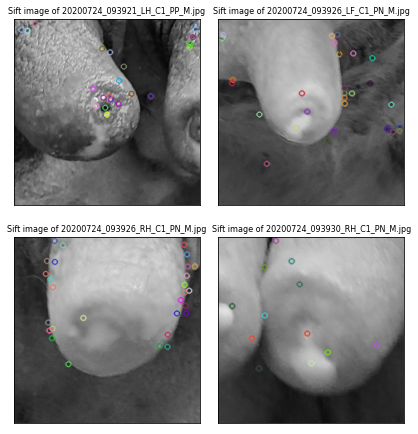

In [56]:
# Sample of 4 images from the training data
plt.figure(figsize = (7, 16))
for idx, img in enumerate(range(4)):
    plt.subplot(4, 2, idx + 1)
    plt.imshow(cv.cvtColor(siftImages_train[img], cv.COLOR_BGR2RGB))
    plt.title("Sift image of " + file_names_train[img], fontsize = 8)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.1, hspace = 0.01)

plt.show()

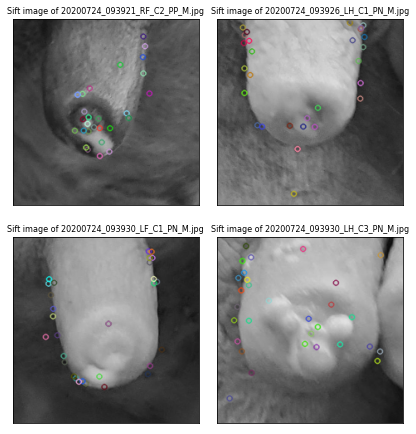

In [57]:
# Sample of 4 images from the training data
plt.figure(figsize = (7, 16))
for idx, img in enumerate(range(4)):
    plt.subplot(4, 2, idx + 1)
    plt.imshow(cv.cvtColor(siftImages_test[img], cv.COLOR_BGR2RGB))
    plt.title("Sift image of " + file_names_test[img], fontsize = 8)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.1, hspace = 0.01)

plt.show()

# 4. Extract features of training and test images using SURF (20 points)
Please print the size of extracted features, e.g., training features: 1149 * d, test features: 380 *d

In [58]:
def SURF(data):
    '''
        Speeded Up Robust Features (SURF)
    '''
    my_images = []
    my_features = []

    for image in data:
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

        # Initialize SURF detector
        surf = cv.xfeatures2d.SURF_create()

        # Detect and compute keypoints and descriptors for training image
        keypoints, descriptors = surf.detectAndCompute(image, None)

        img = cv.drawKeypoints(gray, keypoints, image)
        my_images.append(img)

        if descriptors is not None:
            my_features.append(np.mean(descriptors, axis = 0))
        else:
            my_features.append(my_features[-1])
    
    return np.array(my_features), np.array(my_images)

In [59]:
surfFeatures_train, surfImages_train = SURF(X_train)

In [60]:
surfFeatures_test, surfImages_test = SURF(X_test)

In [61]:
# Training features
print(f"Training features : {surfFeatures_train.shape}")

# Test features
print(f"Test features : {surfFeatures_test.shape}")

Training features : (1149, 64)
Test features : (380, 64)


# 5. Call SVM and kNN from scikit-learn and train the extracted HOG, SIFT and SURF features, respectively, save three CSV files of test dataset using three features (10 points)

In [67]:
# Create SVM and kNN classifiers
my_svm = svm.SVC(kernel = 'linear', gamma = 10)
my_knn = KNeighborsClassifier(n_neighbors = 1)

#### __HOG__

In [ ]:
# Train SVM and kNN classifiers on HOG features
my_svm.fit(hogFeatures_train, y_train)
my_knn.fit(hogFeatures_train, y_train)

# Predict test data labels using SVM and kNN classifiers on HOG features
svm_hog_pred = my_svm.predict(hogFeatures_test)
knn_hog_pred = my_knn.predict(hogFeatures_test)

In [74]:
print(f"svm_hog_pred.shape = {svm_hog_pred.shape}")
print(f"knn_hog_pred.shape = {knn_hog_pred.shape}")

svm_hog_pred.shape = (380,)
knn_hog_pred.shape = (380,)


#### __SIFT__

In [70]:
# Train SVM and kNN classifiers on SIFT features
my_svm.fit(siftFeatures_train, y_train)
my_knn.fit(siftFeatures_train, y_train)

# Predict test data labels using SVM and kNN classifiers on SIFT features
svm_sift_pred = my_svm.predict(siftFeatures_test)
knn_sift_pred = my_knn.predict(siftFeatures_test)

In [75]:
print(f"svm_sift_pred.shape = {svm_sift_pred.shape}")
print(f"knn_sift_pred.shape = {knn_sift_pred.shape}")

svm_sift_pred.shape = (380,)
knn_sift_pred.shape = (380,)


#### __SURF__

In [71]:
# Train SVM and kNN classifiers on SURF features
my_svm.fit(surfFeatures_train, y_train)
my_knn.fit(surfFeatures_train, y_train)

# Predict test data labels using SVM and kNN classifiers on SURF features
svm_surf_pred = my_svm.predict(surfFeatures_test)
knn_surf_pred = my_knn.predict(surfFeatures_test)

In [76]:
print(f"svm_surf_pred.shape = {svm_surf_pred.shape}")
print(f"knn_surf_pred.shape = {knn_surf_pred.shape}")

svm_surf_pred.shape = (380,)
knn_surf_pred.shape = (380,)


#### __Save to CSV__

In [85]:
# Create a csv folder
csv_folder = "./csv"

if not os.path.exists(csv_folder):
    os.makedirs(csv_folder)

In [86]:
# Save test data predictions to CSV files
svm_hog_df = pd.DataFrame(list(zip(file_names_test, svm_hog_pred)))
svm_hog_df.to_csv('./csv/svm_hog_pred.csv', index = False, header = False)

knn_hog_df = pd.DataFrame(list(zip(file_names_test, knn_hog_pred)))
knn_hog_df.to_csv('./csv/knn_hog_pred.csv', index = False, header = False)

svm_sift_df = pd.DataFrame(list(zip(file_names_test, svm_sift_pred)))
svm_sift_df.to_csv('./csv/svm_sift_pred.csv', index = False, header = False)

knn_sift_df = pd.DataFrame(list(zip(file_names_test, knn_sift_pred)))
knn_sift_df.to_csv('./csv/knn_sift_pred.csv', index = False, header = False)

svm_surf_df = pd.DataFrame(list(zip(file_names_test, svm_surf_pred)))
svm_surf_df.to_csv('./csv/svm_surf_pred.csv', index = False, header = False)

knn_surf_df = pd.DataFrame(list(zip(file_names_test, knn_surf_pred)))
knn_surf_df.to_csv('./csv/knn_surf_pred.csv', index = False, header = False)

# 6. Report the accuracy using Cow_teat_classfication_accuracy software, please attach the results image here (20 points)

### (1). SVM and 1NN using HOG features

<center>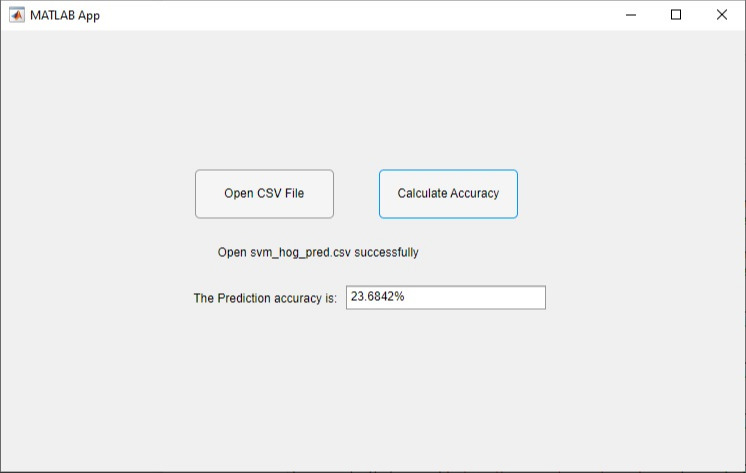</center>

<center>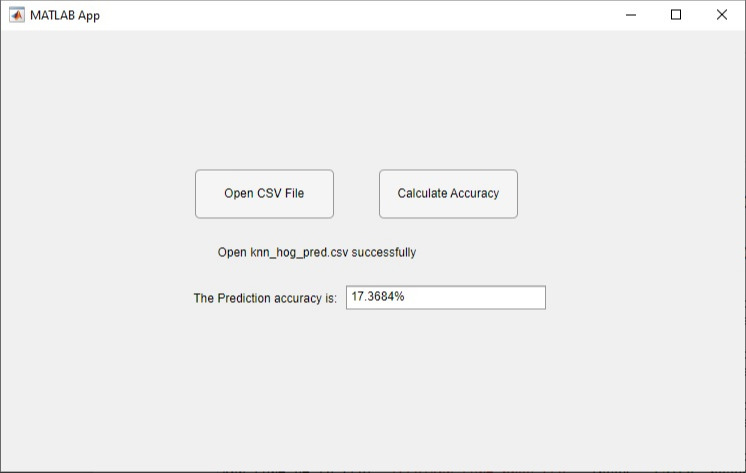</center>

### (2). SVM and 1NN using SIFT features

<center>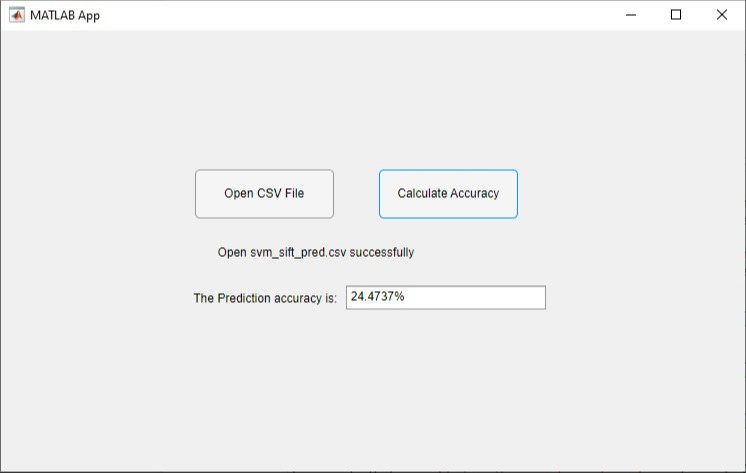</center>

<center>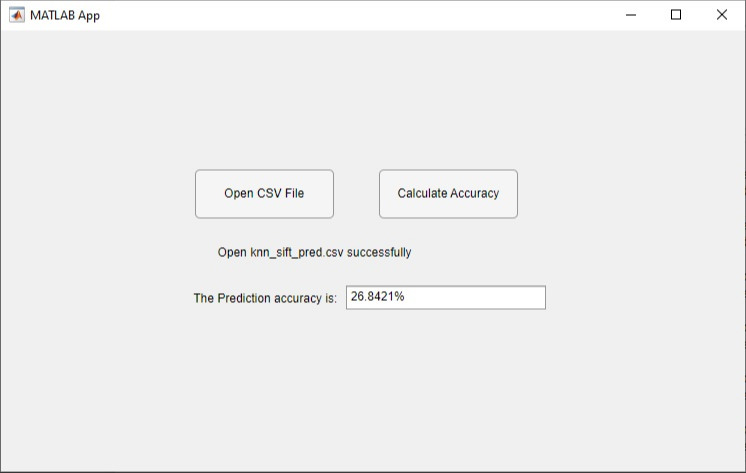</center>

### (3). SVM and 1NN using SURF features

<center>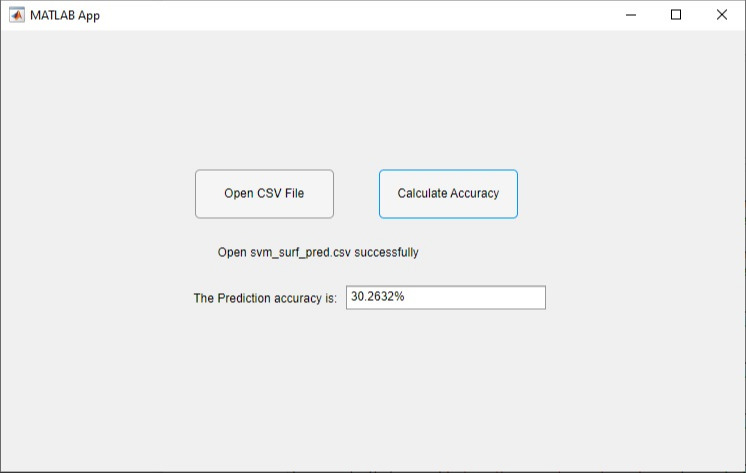</center>

<center>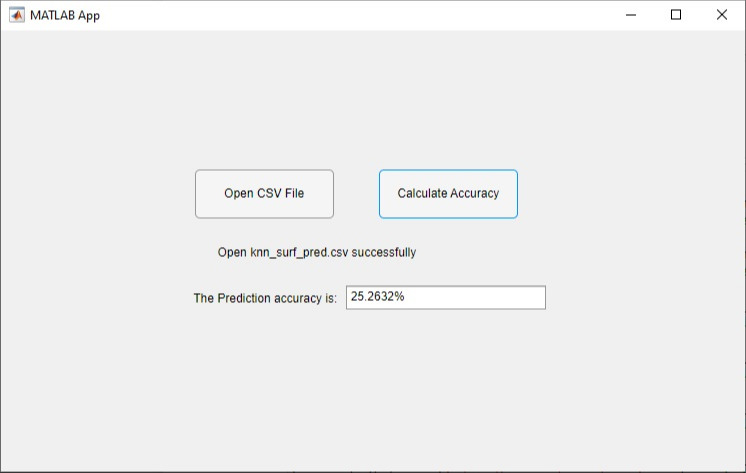</center>

# References

- Python – List Files in a Directory : https://www.geeksforgeeks.org/python-list-files-in-a-directory/

- How to Apply HOG Feature Extraction in Python : https://www.thepythoncode.com/article/hog-feature-extraction-in-python

- A Detailed Guide to the Powerful SIFT Technique for Image Matching (with Python code) : https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

- Introduction to SURF (Speeded-Up Robust Features) : https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html